In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE


## Carregar os Dados

In [2]:
# Carregar Dataframe
df_cosmeticos = pd.read_csv('./dataset/cosmeticos.csv')

In [3]:
df_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [4]:
df_cosmeticos.head()

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [5]:
df_cosmeticos.tail()

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0
1471,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1


## EDA

In [6]:
# Transformar valores da coluna "ingredientes" em um novo Dataframe
df_cosmeticos_eda = df_cosmeticos.copy()
df_cosmeticos_eda = df_cosmeticos_eda['Ingredientes'].str.split(',')

In [7]:
df_cosmeticos_eda.head()

0    [Algae (Seaweed) Extract,  Mineral Oil,  Petro...
1    [Galactomyces Ferment Filtrate (Pitera),  Buty...
2    [Water,  Dicaprylyl Carbonate,  Glycerin,  Cet...
3    [Algae (Seaweed) Extract,  Cyclopentasiloxane,...
4    [Water,  Snail Secretion Filtrate,  Phenyl Tri...
Name: Ingredientes, dtype: object

In [8]:
df_ingredientes = df_cosmeticos_eda.explode('Ingredientes')

In [9]:
df_ingredientes

0              Algae (Seaweed) Extract
1                          Mineral Oil
2                           Petrolatum
3                             Glycerin
4                        Isohexadecane
                     ...              
45811           Alpha-isomethyl Ionone
45812                 CI 14700 (Red 4)
45813              CI 19140 (Yellow 5)
45814               CI 42090 (Blue 1).
45815    Visit the DERMAFLASH boutique
Name: Ingredientes, Length: 45816, dtype: object

### Análise univariada

In [10]:
df_cosmeticos.describe()

,Preco,Rating,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Distribuição da variável Tipo
percentual_tipo = df_cosmeticos.value_counts('Tipo') / len(df_cosmeticos) * 100
percentual_tipo = percentual_tipo.reset_index()
percentual_tipo.columns = ['Tipo', 'Percentual']
fig = px.bar(percentual_tipo, x='Tipo', y='Percentual', color='Tipo', text='Percentual')

# Atualizar o Plot para melhor visualizar os labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')

fig.show()

In [12]:
# Distribuição da variável marca
percentual_marca = df_cosmeticos.value_counts('Marca') / len(df_cosmeticos) * 100
percentual_marca = percentual_marca.reset_index()
percentual_marca.columns = ['Marca', 'Percentual']
fig = px.bar(percentual_marca.head(10), x='Percentual', y='Marca', color='Marca', 
            text='Percentual',orientation='h')

# Atualizar o Plot para melhor visualizar os labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')

fig.show()

In [13]:
# Quantidade de marcas
len(df_cosmeticos['Marca'].unique())

116

In [14]:
# Distribuição da variável Ingrediente
percentual_ingrediente = df_ingredientes.value_counts('Ingredientes') / len(df_ingredientes) * 100
percentual_ingrediente = percentual_ingrediente.reset_index()
percentual_ingrediente.columns = ['Ingrediente', 'Percentual']
fig = px.bar(percentual_ingrediente.head(10), x='Percentual', y='Ingrediente', color='Ingrediente', 
            text='Percentual',orientation='h')

# Atualizar o Plot para melhor visualizar os labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')

fig.show()

In [15]:
len(percentual_ingrediente['Ingrediente'].unique())

7298

In [16]:
px.histogram(df_cosmeticos['Preco'], title='Histograma da variável Preço')

In [17]:
# Distribuição da variável Rating
px.histogram(df_cosmeticos['Rating'], title='Histograma da variável Rating')

### Análise Bivariada

In [18]:
# Plot de Distribuição (BoxPlot) por Tipo e Preço
px.box(df_cosmeticos, x='Preco', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca', 'Nome'])

In [19]:
# Plot de Distribuição (BoxPlot) por Tipo e Rating
px.box(df_cosmeticos, x='Rating', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca', 'Nome'])

In [20]:
# Correlação Preço e Rating
px.scatter(df_cosmeticos, x='Preco', y='Rating', color='Tipo', hover_data=['Marca'])

In [21]:
matrix_corr = df_cosmeticos.corr(numeric_only=True)


<Axes: >

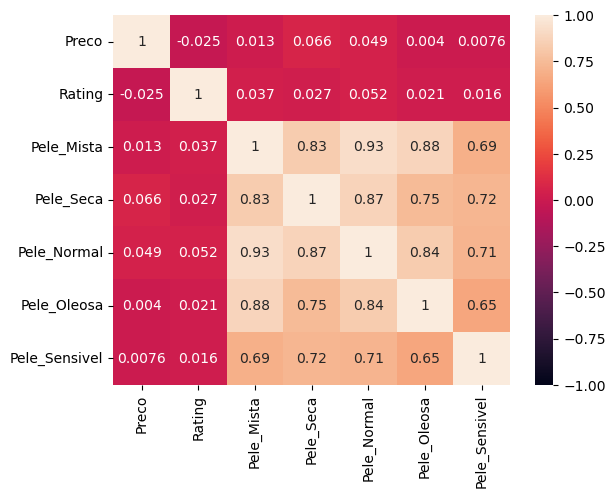

In [22]:
# Plotar matriz de correlaçao

sns.heatmap(matrix_corr, vmin=-1,vmax=1,annot=True)

## Treinar o algoritmo t-SNE

In [23]:
df_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [24]:
X = df_cosmeticos.copy()
X.drop(columns=['Nome','Ingredientes'], axis=1, inplace=True)

numeric_features = ['Preco','Rating']
categorical_features = ['Marca', 'Tipo']
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocess = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, numeric_features),
        ('cat', categorical_transformer,categorical_features)
    ],
    remainder='passthrough'
)

X_transformed = preprocess.fit_transform(X)

In [25]:
X_transformed.shape

(1472, 129)

In [26]:
# Armazenar resultados do t-SNE em Dataframe
results_df = pd.DataFrame()

In [27]:
# Loop de treinamento do algortimo, mudando o parâmetro Perplexity

for perplexity in range(5,51):

    # Criar e treinar o modelo
    tsne = TSNE(n_components=3, perplexity=perplexity, init="random", max_iter=250,random_state=51)
    tsne_results = tsne.fit_transform(X_transformed)

    # Armazenar resultados
    temp_df = pd.DataFrame(tsne_results, columns=['Componente 1', 'Componente 2','Componente 3'])
    temp_df['Perplexity'] = perplexity
    results_df = pd.concat([results_df, temp_df], axis=0)


In [28]:
results_df.head()

,Componente 1,Componente 2,Componente 3,Perplexity
0,-0.497836,0.347982,1.037417,5
1,-0.449566,0.362223,1.121661,5
2,-0.770123,0.592345,-0.308186,5
3,-0.484919,0.354649,1.041578,5
4,-1.505950,0.658267,-0.326157,5


In [29]:
results_df.reset_index(drop=True, inplace=True)

In [30]:
results_df.head()

,Componente 1,Componente 2,Componente 3,Perplexity
0,-0.497836,0.347982,1.037417,5
1,-0.449566,0.362223,1.121661,5
2,-0.770123,0.592345,-0.308186,5
3,-0.484919,0.354649,1.041578,5
4,-1.505950,0.658267,-0.326157,5


## Visualizar Resultados

In [31]:
# Criar um ScatterPlot Animado com variação no Perplexity

fig = px.scatter_3d(results_df,x='Componente 1', y='Componente 2',z='Componente 3', animation_frame='Perplexity',
                title='Visualização do t-SNE com variação do Perplexity')

fig.show()